In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('data/interpolated_co2.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Set seaborn theme
sns.set_theme(style="darkgrid")

# 1. Basic Trend-line

/var/folders/c9/p4s2n3nx6zxffbhgf6dtds_h0000gn/T/ipykernel_36687/1676174145.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/lucifer/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


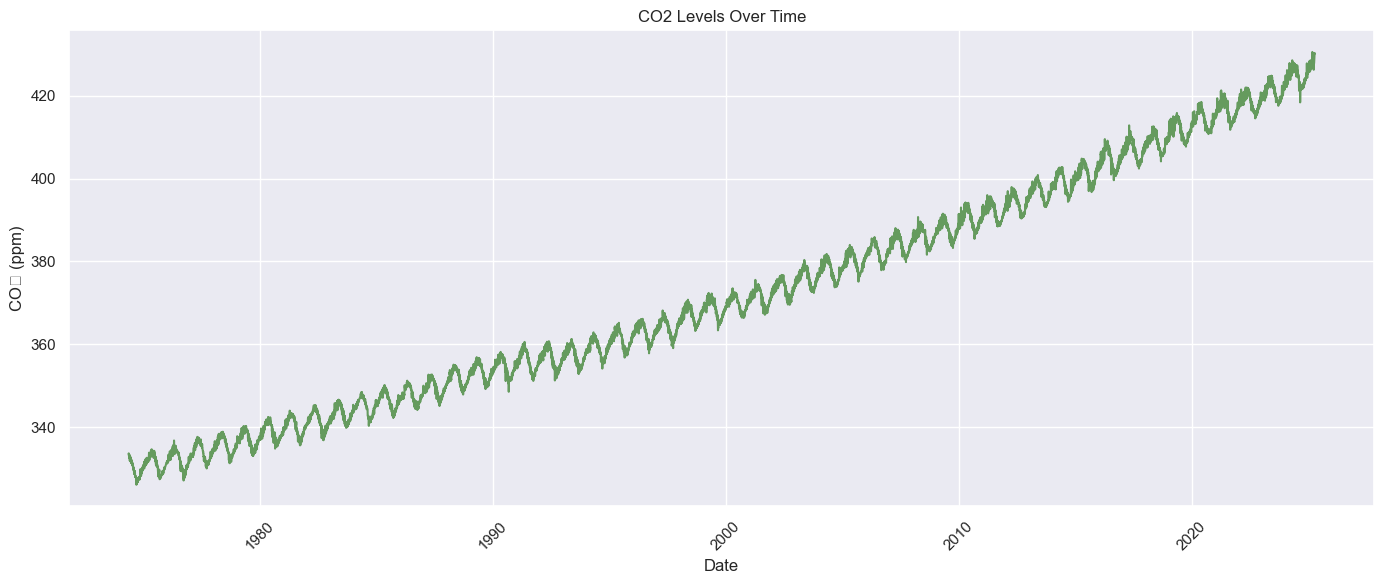

In [43]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='CO2', color='#659B5E')
plt.title("CO2 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("CO₂ (ppm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Histogram of CO2 levels

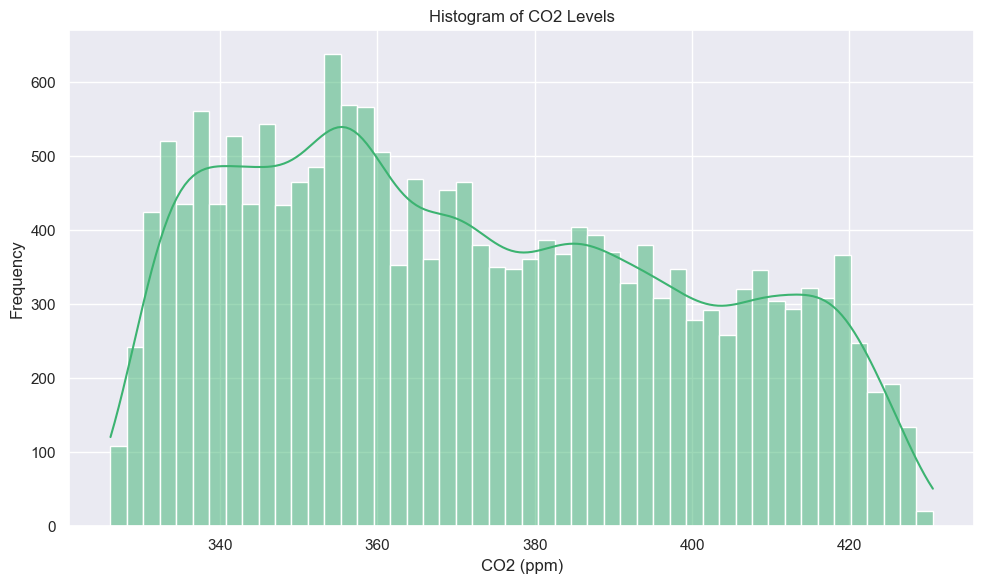

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2'], bins=50, kde=True, color='mediumseagreen')
plt.title("Histogram of CO2 Levels")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Average CO2 levels per day

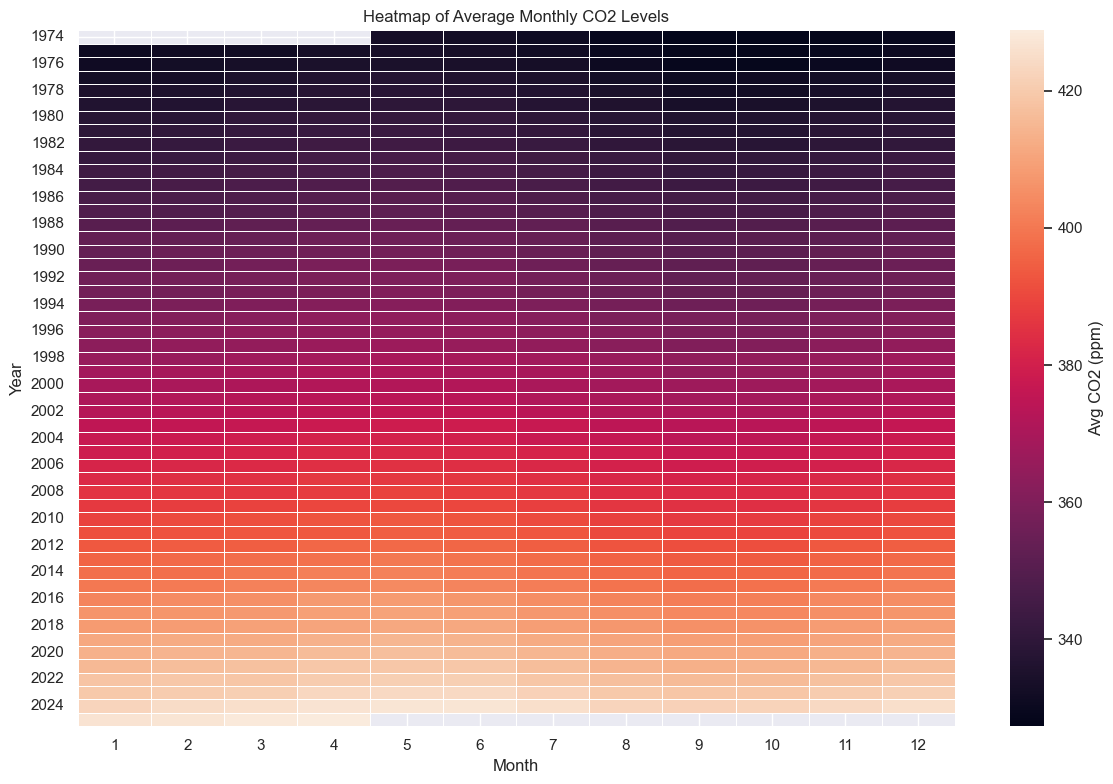

In [11]:
# Prepare data for heatmap: group by year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Compute monthly average CO₂
monthly_avg = df.groupby(['Year', 'Month'])['CO2'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg, cmap="rocket", annot=False, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Avg CO2 (ppm)'})
plt.title("Heatmap of Average Monthly CO2 Levels")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

# 4. CO2 Safety thresholds

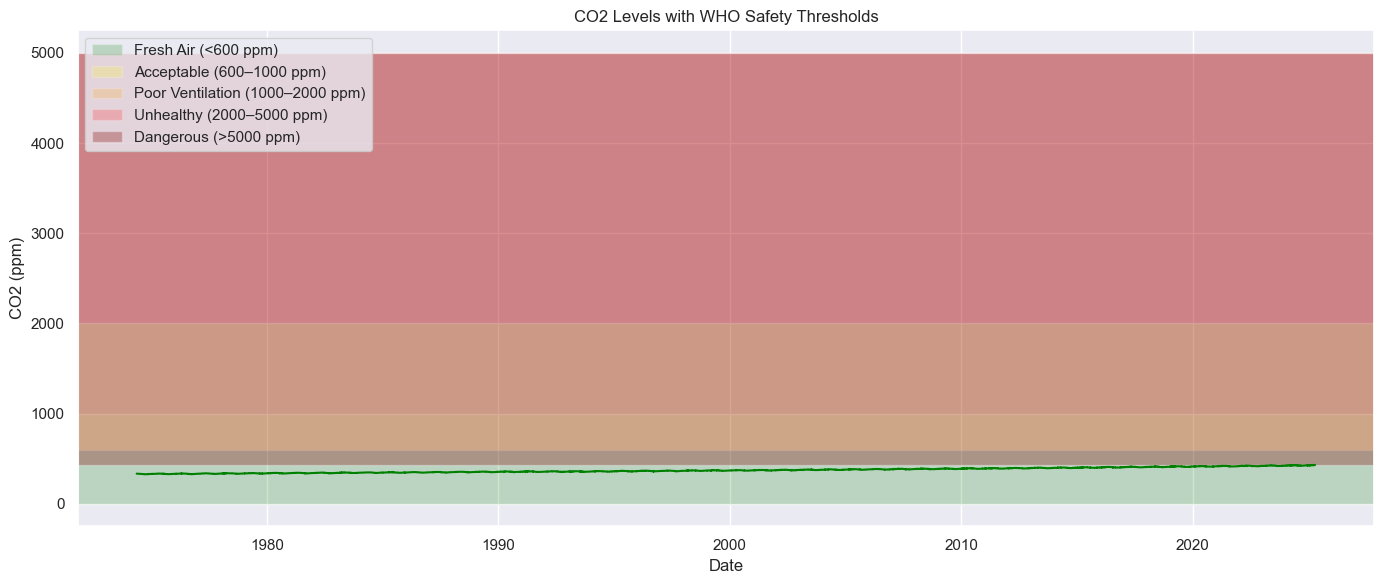

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='CO2', color='Green')

# WHO-based threshold zones
plt.axhspan(0, 600, facecolor='green', alpha=0.2, label='Fresh Air (<600 ppm)')
plt.axhspan(600, 1000, facecolor='yellow', alpha=0.2, label='Acceptable (600–1000 ppm)')
plt.axhspan(1000, 2000, facecolor='orange', alpha=0.2, label='Poor Ventilation (1000–2000 ppm)')
plt.axhspan(2000, 5000, facecolor='red', alpha=0.2, label='Unhealthy (2000–5000 ppm)')
plt.axhspan(5000, df['CO2'].max(), facecolor='maroon', alpha=0.3, label='Dangerous (>5000 ppm)')

plt.title("CO2 Levels with WHO Safety Thresholds")
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 5. Scatter plot of CO2 Levels

/var/folders/c9/p4s2n3nx6zxffbhgf6dtds_h0000gn/T/ipykernel_36687/3452083244.py:6: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/lucifer/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


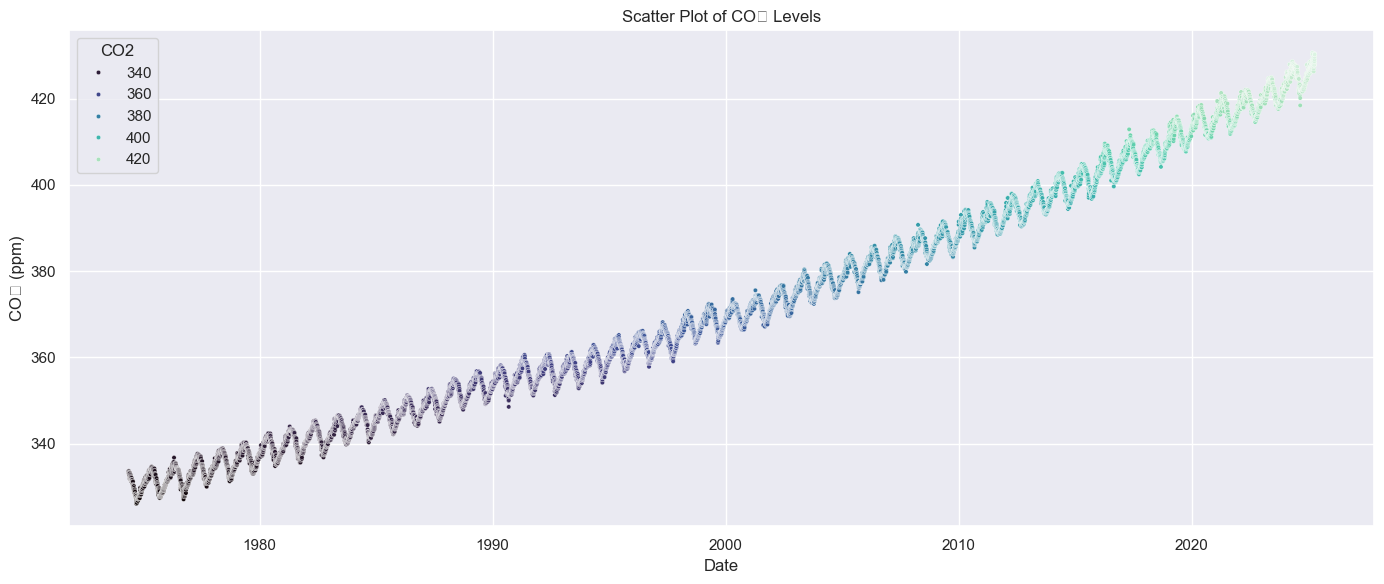

In [21]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Date', y='CO2', hue='CO2', palette='mako', s=10)
plt.title("Scatter Plot of CO2 Levels")
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.tight_layout()
plt.show()

# 6. Min and Max CO₂ in Each Month

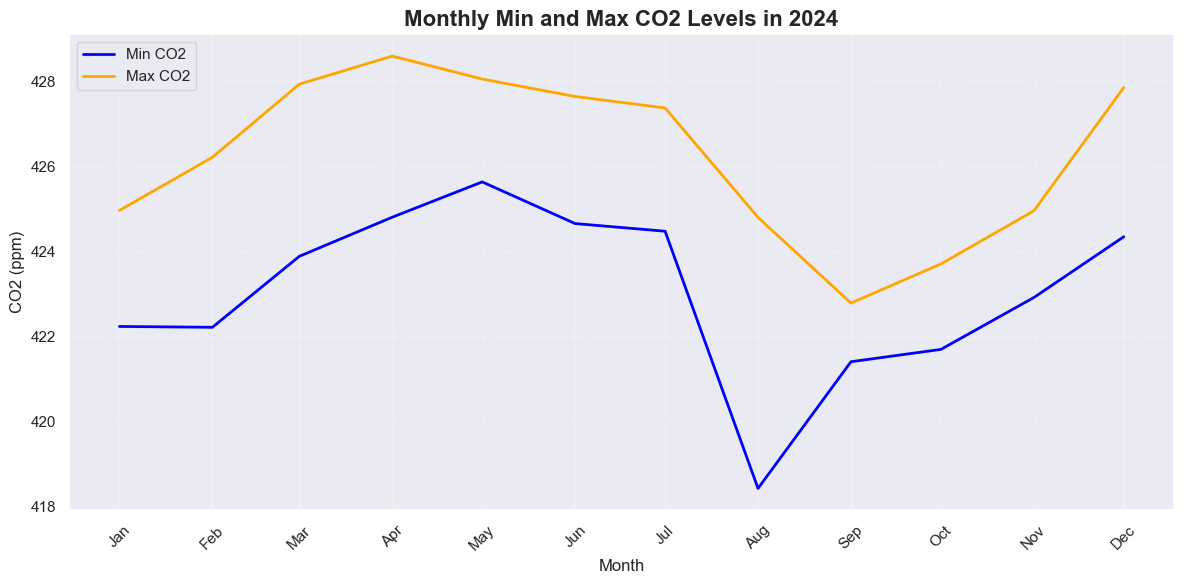

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Group by month
monthly_min = df.groupby('Month')['CO2'].min()
monthly_max = df.groupby('Month')['CO2'].max()

# Create dataframe
monthly_df = pd.DataFrame({
    'Month': monthly_min.index,
    'Min CO2': monthly_min.values,
    'Max CO2': monthly_max.values
})

# Filter to only 2024
monthly_df_2024 = monthly_df[(monthly_df['Month'] >= '2024-01') & (monthly_df['Month'] < '2025-01')]

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_df_2024, x='Month', y='Min CO2', color='blue', label='Min CO2', linewidth=2)
sns.lineplot(data=monthly_df_2024, x='Month', y='Max CO2', color='orange', label='Max CO2', linewidth=2)

plt.title("Monthly Min and Max CO2 Levels in 2024", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("CO2 (ppm)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Format x-axis nicely
plt.xticks(
    ticks=monthly_df_2024['Month'],
    labels=[d.strftime('%b') for d in monthly_df_2024['Month']],
    rotation=45
)

plt.tight_layout()
plt.legend()
plt.show()

# 7. Min and Max CO₂ in Each Year

/var/folders/c9/p4s2n3nx6zxffbhgf6dtds_h0000gn/T/ipykernel_36687/3303264080.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/lucifer/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


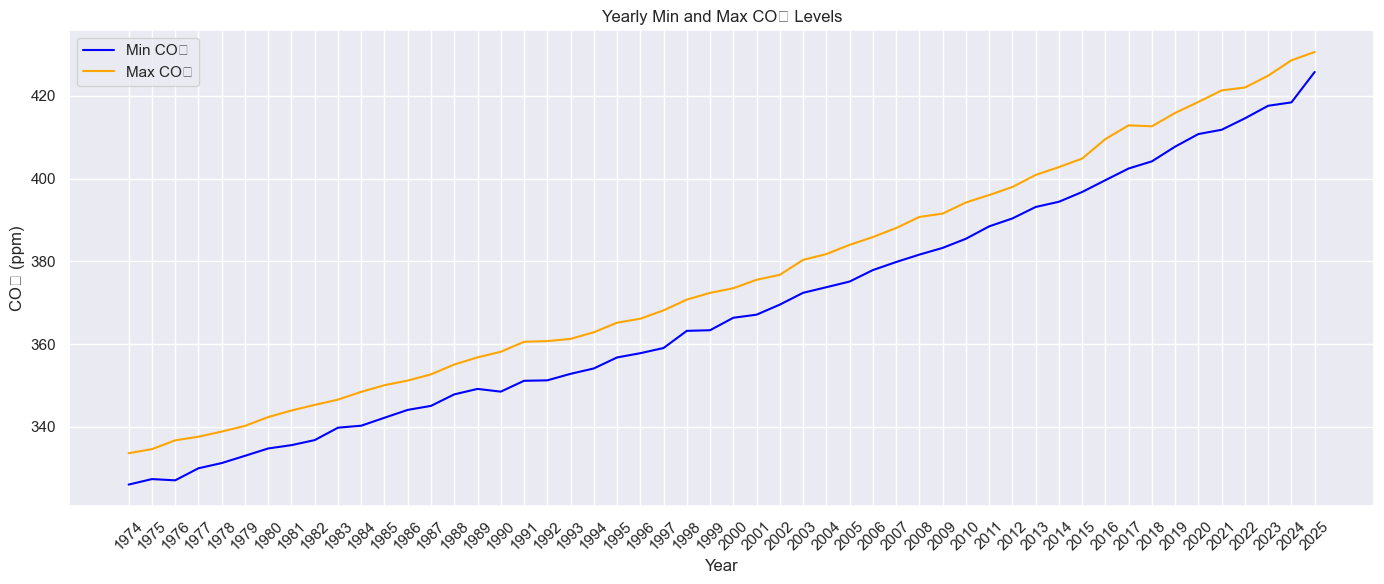

In [35]:
import matplotlib.pyplot as plt

df['Year'] = df['Date'].dt.year
yearly_min_max = df.groupby('Year')['CO2'].agg(['min', 'max']).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(yearly_min_max['Year'], yearly_min_max['min'], label='Min CO₂', color='blue')
plt.plot(yearly_min_max['Year'], yearly_min_max['max'], label='Max CO₂', color='orange')
plt.title("Yearly Min and Max CO₂ Levels")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.legend()

# Set x-axis to display each year as a label
plt.xticks(yearly_min_max['Year'], rotation=45)

plt.tight_layout()
plt.show()
